# Hotel Review

# Problem Statement

Hotels play a crucial role in traveling With this dataset,Explore Hotel aspects and Predict the rating
of each review.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [3]:
hotel = pd.read_csv("D:\Stuff\IMARTICUS\Python\Python Programming/tripadvisor_hotel_reviews.csv")

In [4]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
hotel.shape

(20491, 2)

In [6]:
hotel.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
#hotel.Review.replace({"pos":1,"neg":0},inplace = True)
for i in range(0, hotel.shape[0]):
    if hotel.Rating[i]==1 or hotel.Rating[i]==2 or hotel.Rating[i]==3:
        hotel.Rating[i]=0
    elif hotel.Rating[i]==4 or hotel.Rating[i]==5:
        hotel.Rating[i]=1

<ipython-input-7-ffd966b1bc7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.Rating[i]=1
<ipython-input-7-ffd966b1bc7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.Rating[i]=0


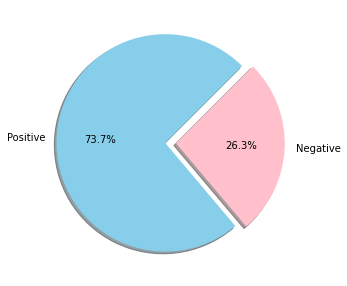

In [52]:

fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=hotel[hotel['Rating']==1]
neg=hotel[hotel['Rating']==0]
ck=[pos['Rating'].count(),neg['Rating'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [8]:
#word cloud
hotel.Review = hotel.Review.str.lower() #comvert into lower case

In [9]:
from nltk.corpus import stopwords

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Gabru
[nltk_data]     jawaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopwords.words("english")  #see the stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
import string

In [13]:
string.punctuation  #shows me the punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def text_process(mess):
    """
    1.reomve the puctuation
    2.remove the stopwords
    3.return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if word not in stopwords.words("english")]

In [15]:
hotel['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer #use to count each and every word

bow_transformer = CountVectorizer(analyzer = text_process).fit(hotel["Review"])

In [17]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001DBB73B3790>)

In [18]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [19]:
len(bow_transformer.vocabulary_)

81408

In [20]:
hotel_bow = bow_transformer.transform(hotel.Review)

In [21]:
hotel_bow.shape

(20491, 81408)

In [22]:
type(hotel_bow)

scipy.sparse.csr.csr_matrix

# Spliting a dataset into X and Y

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hotel_bow,hotel.Rating, test_size= .2)

# Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [26]:
logreg.fit(x_train,y_train)

C:\Users\Gabru jawaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix

In [29]:
logreg.fit(x_train,y_train)
pred_lg = logreg.predict(x_test)
tab_lg = confusion_matrix(pred_lg,y_test)
tab_lg

C:\Users\Gabru jawaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 780,  194],
       [ 285, 2840]], dtype=int64)

In [30]:
acc =tab_lg.diagonal().sum() / tab_lg.sum()
acc

0.8831422298121493

In [33]:
print("Accuracy of the model is",acc)

Accuracy of the model is 0.8831422298121493


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [35]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[ 168,   60],
       [ 897, 2974]], dtype=int64)

In [36]:
acc =tab_dt.diagonal().sum() / tab_dt.sum()
acc

0.7665284215662357

In [37]:
print("Accuracy of the model is",acc)

Accuracy of the model is 0.7665284215662357


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(n_estimators =100)

In [39]:
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

tab_rf= confusion_matrix(pred_rf,y_test)
tab_rf

array([[ 402,   14],
       [ 663, 3020]], dtype=int64)

In [40]:
acc =tab_rf.diagonal().sum() / tab_rf.sum()
acc

0.8348377653086119

In [41]:
print("Accuracy of the model is",acc)

Accuracy of the model is 0.8348377653086119


# Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
naive_bayes = MultinomialNB()

In [44]:
naive_bayes.fit(x_train,y_train)
pred_nb = naive_bayes.predict(x_test)
tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[ 703,  140],
       [ 362, 2894]], dtype=int64)

In [45]:
acc =tab_nb.diagonal().sum() / tab_nb.sum()
acc

0.877531105147597

In [46]:
print("Accuracy of the model is",acc)

Accuracy of the model is 0.877531105147597
